# Time Domain Features 

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from scipy.stats import kurtosis, skew
from scipy.signal import correlate

In [5]:
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

In [6]:
# Load and process the audio files
debussy, sr_debussy = librosa.load(debussy_file, sr=None)
redhot, sr_redhot = librosa.load(redhot_file, sr=None)
duke, sr_duke = librosa.load(duke_file, sr=None)

In [10]:
print("Debussy: ", debussy.shape, sr_debussy)
print("Red Hot: ", redhot.shape, sr_redhot)
print("Duke: ", duke.shape, sr_duke)

Debussy:  (661500,) 22050
Red Hot:  (661500,) 22050
Duke:  (661500,) 22050


Description: Autocorrelation is the correlation of a signal with a delayed version of itself, used to detect repeating patterns or periodicity.

Use: Used in pitch detection, speech processing, and musical signal analysis to identify the periodicity or pitch of the signal.

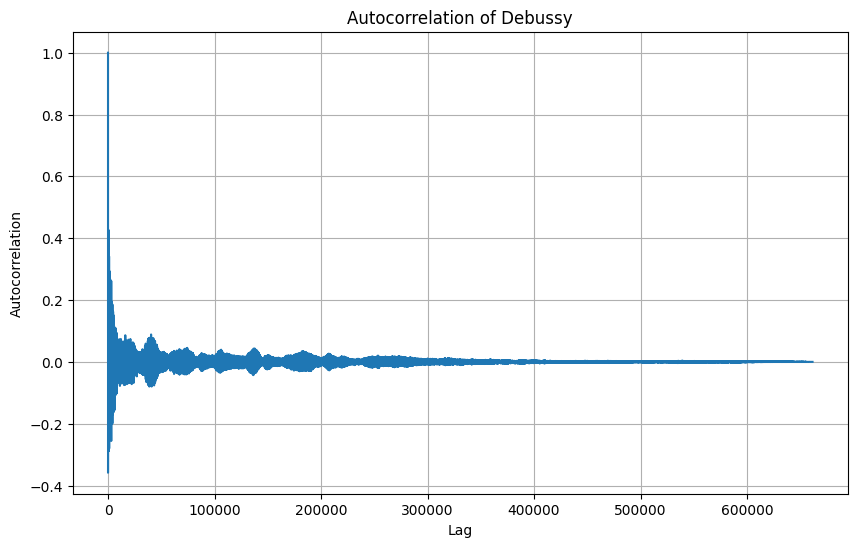

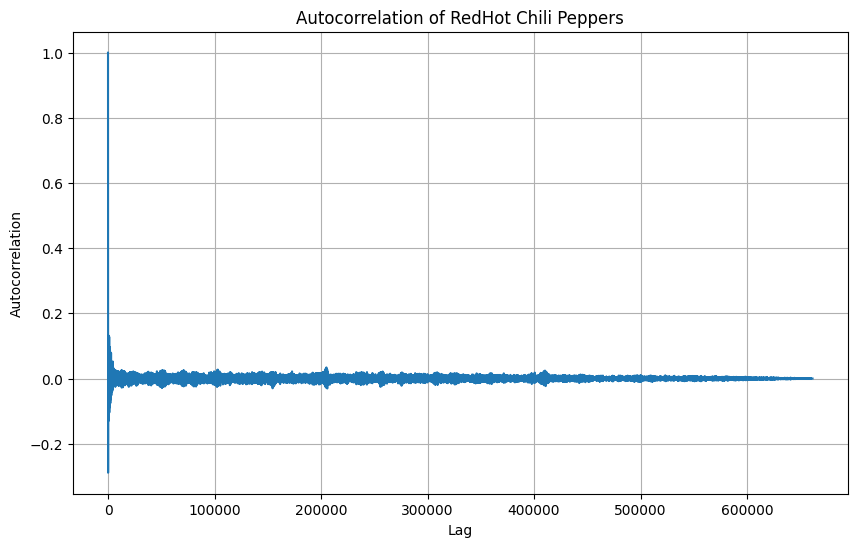

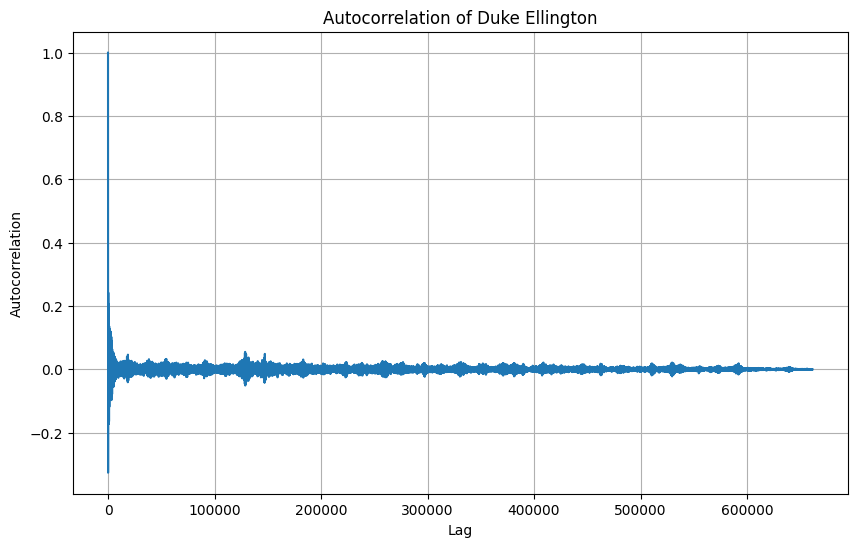

In [7]:
# Function to compute the autocorrelation manually
def autocorrelation(x):
    # Normalize the signal to avoid overflow
    x = x - np.mean(x)
    norm = np.dot(x, x)
    corr = np.correlate(x, x, mode='full') / norm
    return corr[len(corr) // 2:]  # Take the second half (positive lags)

# Function to display the autocorrelation plot
def plot_autocorrelation(signal, title):
    # Calculate autocorrelation using the manual method
    corr = autocorrelation(signal)
    
    plt.figure(figsize=(10, 6))
    plt.plot(corr)
    plt.title(f'Autocorrelation of {title}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Plot the autocorrelation for each file
plot_autocorrelation(debussy, "Debussy")
plot_autocorrelation(redhot, "RedHot Chili Peppers")
plot_autocorrelation(duke, "Duke Ellington")

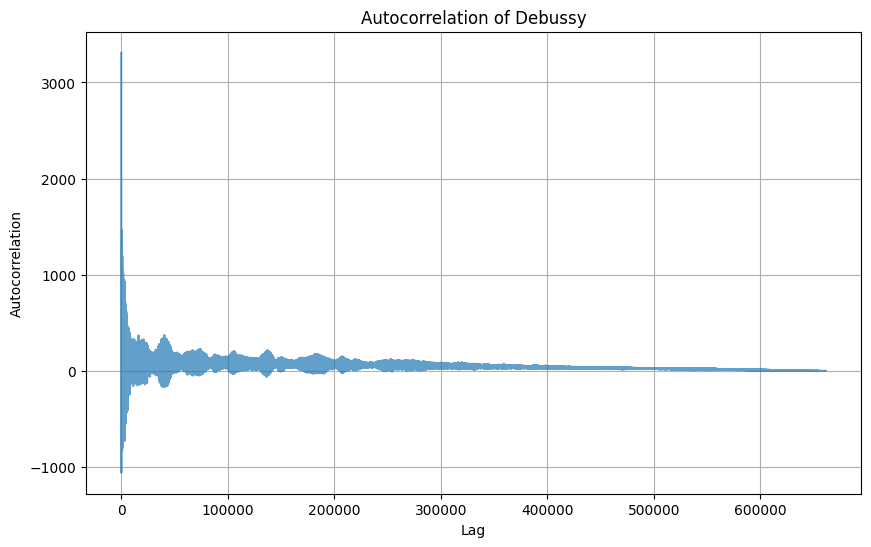

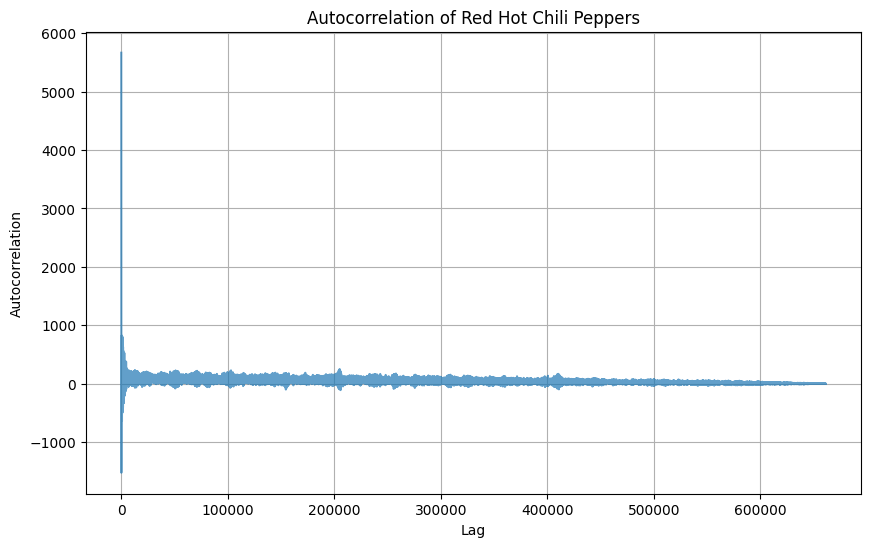

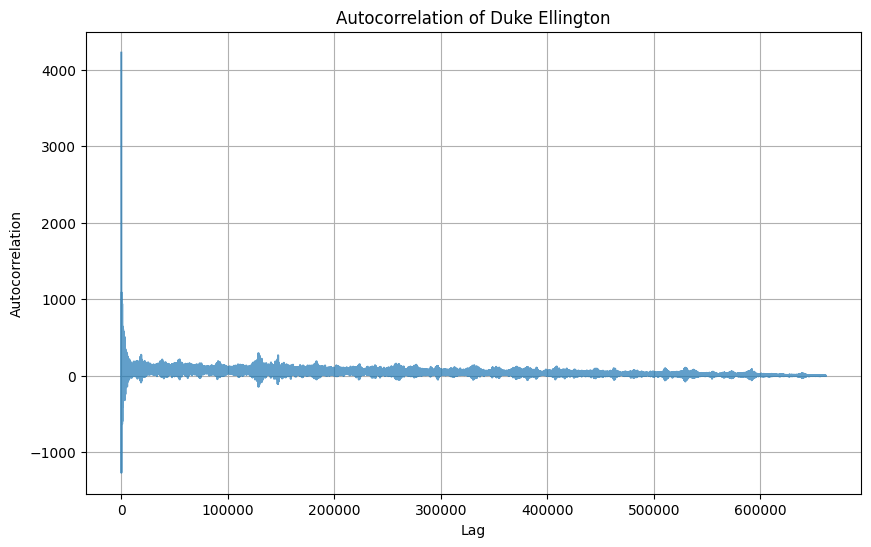

In [8]:
# Function to display the autocorrelation plot using librosa's autocorrelate function
def plot_autocorrelation(signal, title):
    # Calculate autocorrelation using librosa's autocorrelate
    corr = librosa.autocorrelate(signal)
    
    # Plot the autocorrelation using librosa's display module
    plt.figure(figsize=(10, 6))
    plt.plot(corr, alpha=0.7)
    plt.title(f'Autocorrelation of {title}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Plot the autocorrelation for each audio file
plot_autocorrelation(debussy, 'Debussy')
plot_autocorrelation(redhot, 'Red Hot Chili Peppers')
plot_autocorrelation(duke, 'Duke Ellington')

Description:
The peak amplitude is the maximum absolute value of the audio waveform. It measures the loudest point in the signal. It can be used to identify the highest point of sound intensity.

Use Case:

Commonly used in audio normalization to set consistent volume levels in audio files.

Useful for identifying clipping in audio, which occurs when the signal exceeds the maximum level and distorts.

Peak Amplitude: 0.625152587890625
Peak Amplitude: 0.7645263671875
Peak Amplitude: 0.563385009765625


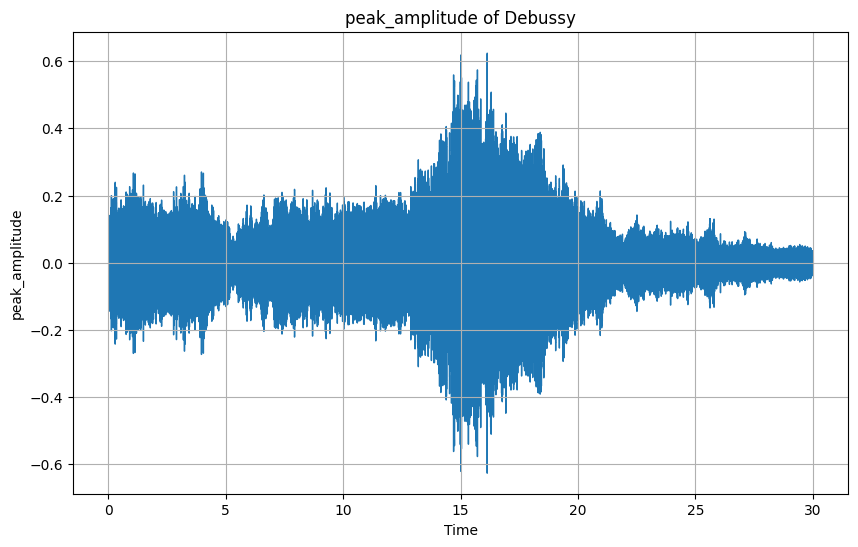

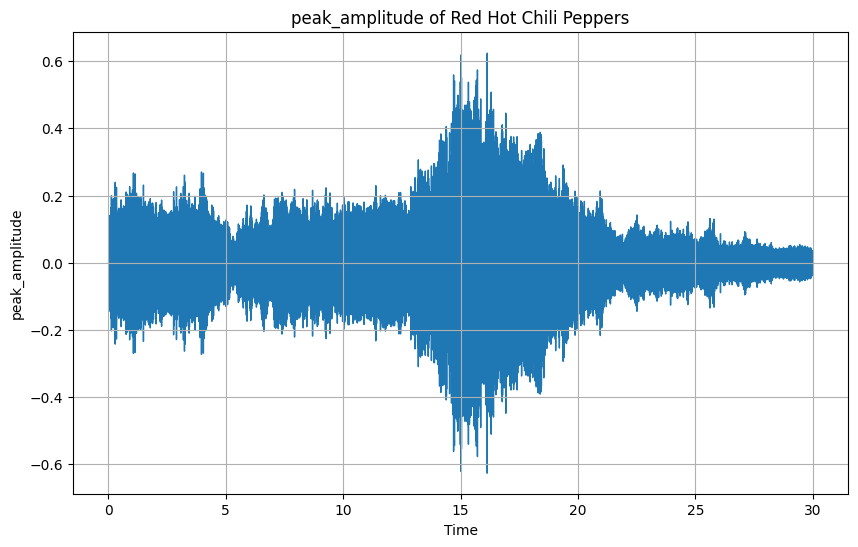

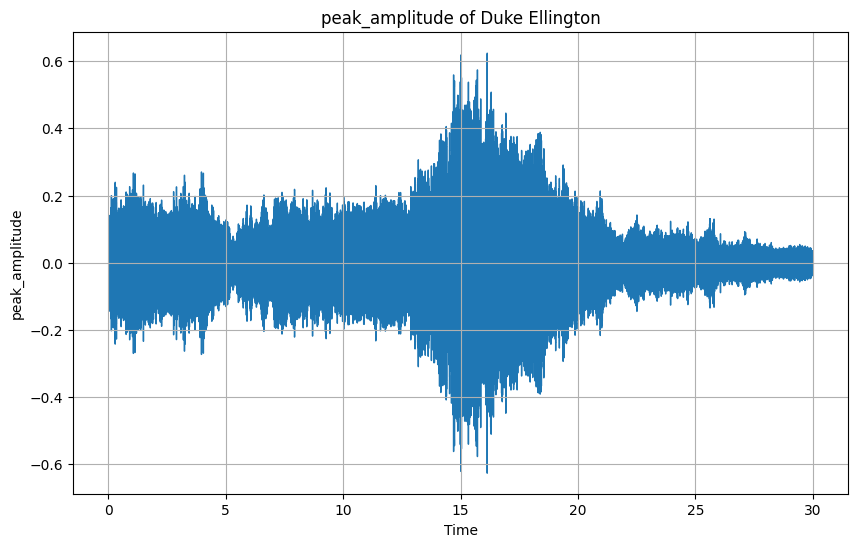

In [11]:
# Calculate the peak amplitude
peak_amplitude_1 = np.max(np.abs(debussy))
peak_amplitude_2 = np.max(np.abs(redhot))
peak_amplitude_3 = np.max(np.abs(duke))

# Print the peak amplitude
print(f"Peak Amplitude: {peak_amplitude_1}")
print(f"Peak Amplitude: {peak_amplitude_2}")
print(f"Peak Amplitude: {peak_amplitude_3}")

# Function to display the autocorrelation plot using librosa's autocorrelate function
def peak_amplitude(signal, sr, title):
    # Calculate autocorrelation using librosa's autocorrelate
    np.max(np.abs(signal))
    
    # Plot the autocorrelation using librosa's display module
    plt.figure(figsize=(10, 6))
    librosa.display.waveshow(debussy, sr=sr)
    plt.title(f'peak_amplitude of {title}')
    plt.ylabel('peak_amplitude')
    plt.grid(True)
    plt.show()

# Plot the autocorrelation for each audio file
peak_amplitude(debussy, sr_debussy, 'Debussy')
peak_amplitude(redhot, sr_redhot, 'Red Hot Chili Peppers')
peak_amplitude(duke, sr_duke, 'Duke Ellington')

Description: Skewness measures the asymmetry of the signal's waveform distribution. A positive skew indicates that the signal has a long right tail, while a negative skew indicates a long left tail.

Use case: 

Skewness is used in audio signal characterization and classification tasks, especially in speech and music genre classification.

It can provide insight into the distribution of audio signal values, which can be indicative of certain signal types or emotions.

Skewness of Debussy Audio: 0.02601500228047371
Skewness of Redhot Audio: -0.04115254804491997
Skewness of Duke Audio: 0.10423169285058975


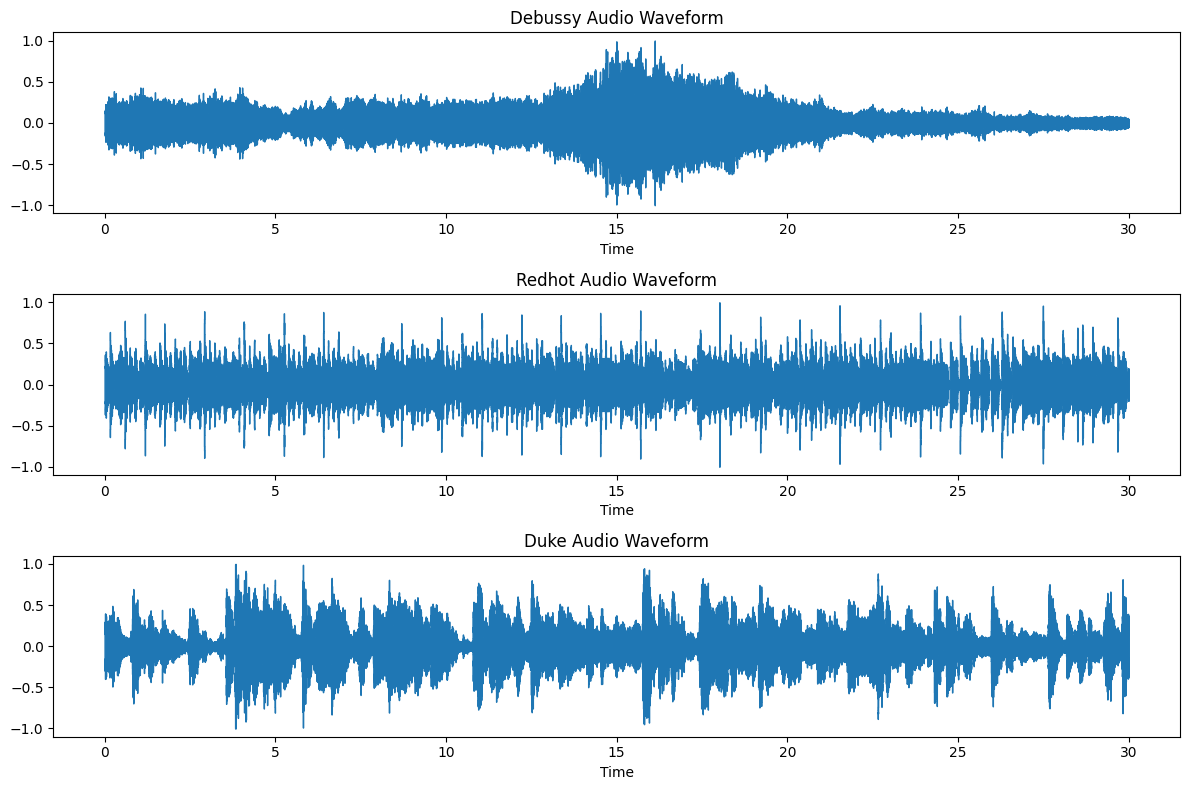

In [12]:
# Load the audio files with their sample rates
debussy_audio, sr_debussy = librosa.load(debussy_file, sr=None)
redhot_audio, sr_redhot = librosa.load(redhot_file, sr=None)
duke_audio, sr_duke = librosa.load(duke_file, sr=None)

# Normalize the audio signals
debussy_audio = librosa.util.normalize(debussy_audio)
redhot_audio = librosa.util.normalize(redhot_audio)
duke_audio = librosa.util.normalize(duke_audio)

# Function to compute skewness manually
def compute_skewness_manual(x):
    N = len(x)
    mean_x = np.mean(x)
    std_x = np.std(x)

    # Calculate the third central moment
    third_moment = np.sum((x - mean_x)**3) / N

    # Calculate skewness
    skewness = third_moment / (std_x**3)
    
    return skewness

# Compute skewness for each audio signal
debussy_skew = compute_skewness_manual(debussy_audio)
redhot_skew = compute_skewness_manual(redhot_audio)
duke_skew = compute_skewness_manual(duke_audio)

# Print skewness for each audio file
print(f"Skewness of Debussy Audio: {debussy_skew}")
print(f"Skewness of Redhot Audio: {redhot_skew}")
print(f"Skewness of Duke Audio: {duke_skew}")

# Plot the waveforms of the three audio files
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy_audio, sr=sr_debussy)
plt.title("Debussy Audio Waveform")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot_audio, sr=sr_redhot)
plt.title("Redhot Audio Waveform")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke_audio, sr=sr_duke)
plt.title("Duke Audio Waveform")

plt.tight_layout()
plt.show()

Kurtosis

Description:
Kurtosis measures the "tailedness" or sharpness of the peak of the waveform's probability distribution. High kurtosis means the waveform has sharp peaks, while low kurtosis suggests that the waveform has a flatter distribution.

Use Case:

Used in audio signal analysis to characterize the texture of sound. Sounds with high kurtosis may be more percussive or sharp.
Important in detecting sound events, such as claps or drum hits, in audio processing.

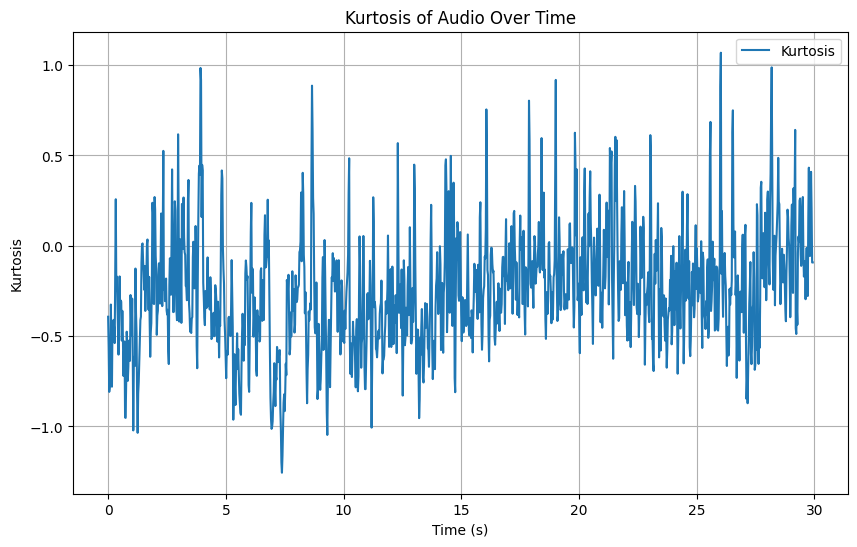

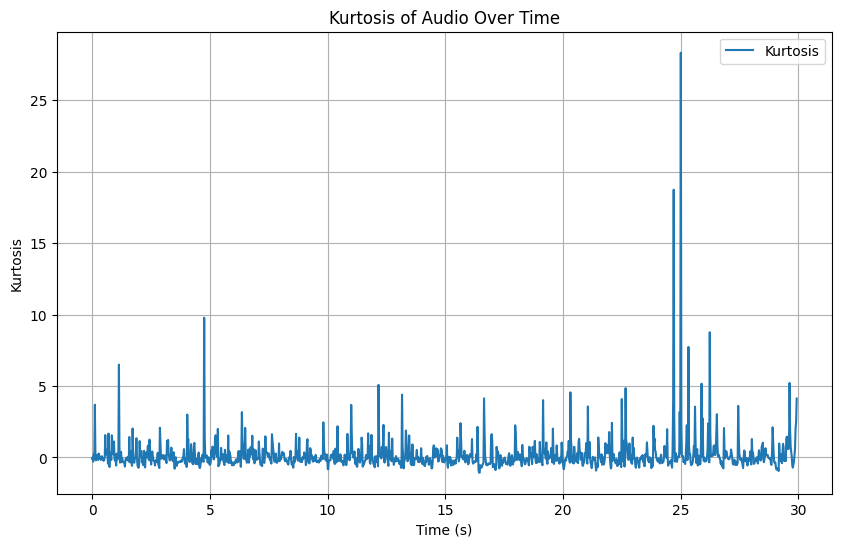

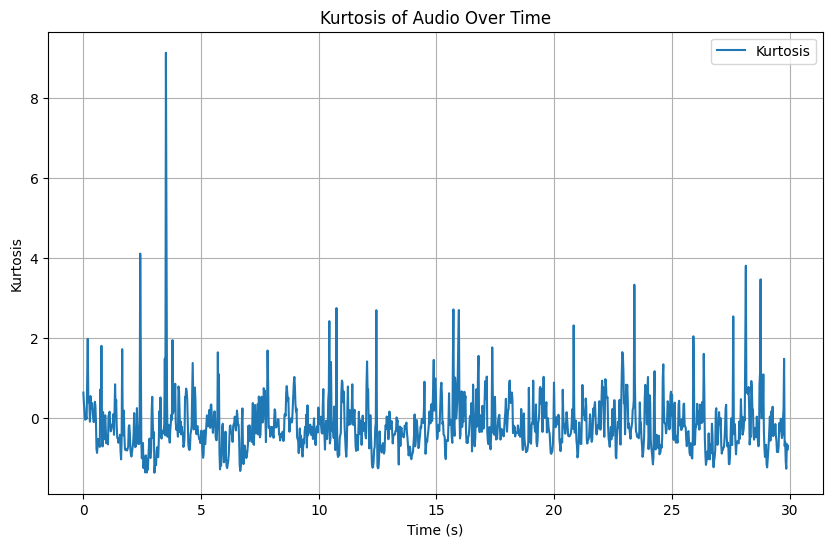

In [20]:
def plot_skewness(signal, sr, title):
    # Define parameters for the sliding window
    window_size = 1024  # Size of each window (samples)
    hop_length = 512    # Hop length (stride between consecutive windows)
    y = signal

    # Initialize an empty list to store kurtosis values
    kurtosis_values = []


    # Process the audio signal in overlapping windows
    for i in range(0, len(y) - window_size, hop_length):
        window = y[i:i + window_size]
        window_kurtosis = kurtosis(window)
        kurtosis_values.append(window_kurtosis)

    # Time axis for plotting the kurtosis values
    time_axis = librosa.frames_to_time(range(len(kurtosis_values)), sr=sr, hop_length=hop_length)

    # Plot the kurtosis over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_axis, kurtosis_values, label='Kurtosis', color='tab:blue')
    plt.title('Kurtosis of Audio Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Kurtosis')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot the kurtosis of the audio signals
plot_skewness(debussy, sr_debussy, 'Debussy')
plot_skewness(redhot, sr_redhot, 'Red Hot Chili Peppers')
plot_skewness(duke, sr_duke, 'Duke Ellington')

Cross-correlation

Description:
Cross-correlation measures the similarity between two signals at different time lags. It is used to detect periodic patterns, such as repeating sounds or rhythms.

Use Case:

Commonly used in detecting synchronized sounds in multiple channels (e.g., stereo sound analysis or multi-microphone arrays).
In speech recognition, it is used to align signals from different sources (e.g., finding where one speech signal starts in a noisy background).

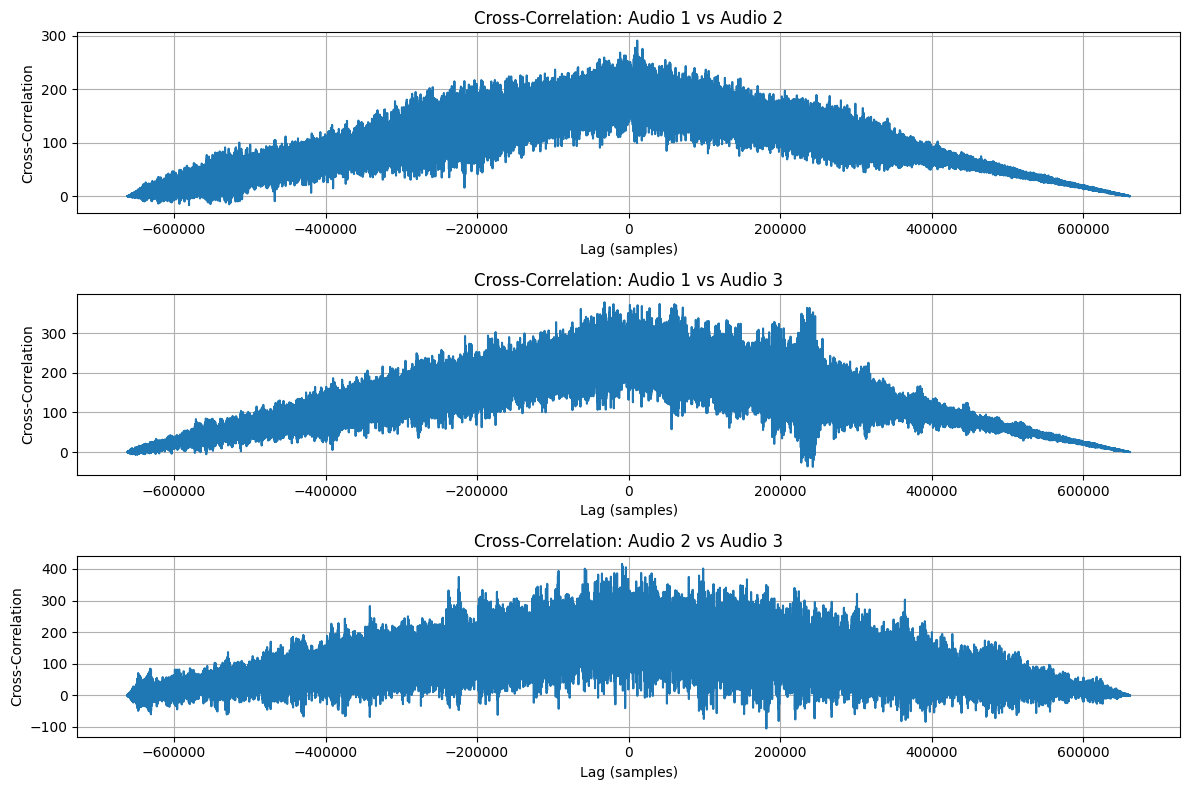

In [25]:
# Ensure all audio files have the same sample rate
if sr_debussy != sr_redhot or sr_redhot != sr_duke:
    raise ValueError("The sample rates of the audio files are different.")

y1 = debussy
y2 = redhot
y3 = duke

# Normalize the signals to avoid any large amplitude differences
y1 = y1 / np.max(np.abs(y1))
y2 = y2 / np.max(np.abs(y2))
y3 = y3 / np.max(np.abs(y3))

# Ensure all signals have the same length by trimming or padding
min_length = min(len(y1), len(y2), len(y3))
y1 = y1[:min_length]
y2 = y2[:min_length]
y3 = y3[:min_length]

# Compute cross-correlation for the three pairs of audio files
cross_corr_1_2 = correlate(y1, y2, mode='full')
cross_corr_1_3 = correlate(y1, y3, mode='full')
cross_corr_2_3 = correlate(y2, y3, mode='full')

# Create a time axis based on the length of the cross-correlation results
lags = np.arange(-min_length + 1, min_length)

# Plot the cross-correlation between the pairs of audio files
plt.figure(figsize=(12, 8))

# Cross-correlation between audio_file_1 and audio_file_2
plt.subplot(3, 1, 1)
plt.plot(lags, cross_corr_1_2)
plt.title('Cross-Correlation: Audio 1 vs Audio 2')
plt.xlabel('Lag (samples)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

# Cross-correlation between audio_file_1 and audio_file_3
plt.subplot(3, 1, 2)
plt.plot(lags, cross_corr_1_3)
plt.title('Cross-Correlation: Audio 1 vs Audio 3')
plt.xlabel('Lag (samples)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

# Cross-correlation between audio_file_2 and audio_file_3
plt.subplot(3, 1, 3)
plt.plot(lags, cross_corr_2_3)
plt.title('Cross-Correlation: Audio 2 vs Audio 3')
plt.xlabel('Lag (samples)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Frequency Domain Features 

Description: Spectral centroid indicates the "center of mass" of the spectrum, often corresponding to the perceived brightness of the sound.

Use Case: 

Used in music genre classification, sound texture analysis, and audio segmentation to characterize the timbral texture of an audio signal.

[ 953.00239574  986.00813607  974.08757994 ... 1839.90007711 1749.33267494
 1586.83573137]
[3289.98418899 3042.94393118 2647.30782268 ... 3953.55778087 3969.56074201
 3226.701043  ]
[1841.9073738  1611.28559336 1382.90990727 ...  725.26356785  733.31135034
 1012.44599675]


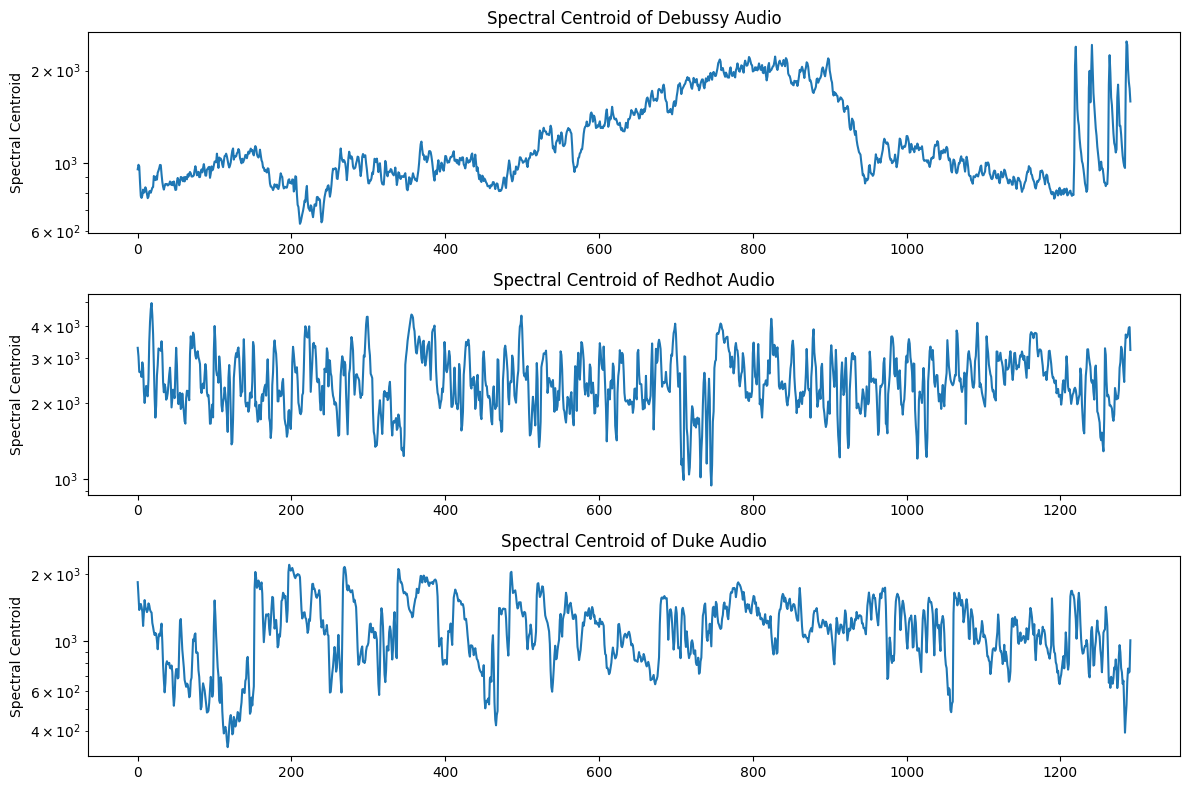

In [16]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Define file paths for the audio files
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

# Load the audio files with their sample rates
debussy_audio, sr_debussy = librosa.load(debussy_file, sr=None)
redhot_audio, sr_redhot = librosa.load(redhot_file, sr=None)
duke_audio, sr_duke = librosa.load(duke_file, sr=None)

# Normalize the audio signals
debussy_audio = librosa.util.normalize(debussy_audio)
redhot_audio = librosa.util.normalize(redhot_audio)
duke_audio = librosa.util.normalize(duke_audio)

# Compute the spectral centroid for each audio file using librosa's built-in function
debussy_centroid = librosa.feature.spectral_centroid(y=debussy_audio, sr=sr_debussy)[0]
redhot_centroid = librosa.feature.spectral_centroid(y=redhot_audio, sr=sr_redhot)[0]
duke_centroid = librosa.feature.spectral_centroid(y=duke_audio, sr=sr_duke)[0]

print(debussy_centroid)
print(redhot_centroid)
print(duke_centroid)

# Plot the spectral centroid for each audio file
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.semilogy(debussy_centroid)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Debussy Audio')

plt.subplot(3, 1, 2)
plt.semilogy(redhot_centroid)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Redhot Audio')

plt.subplot(3, 1, 3)
plt.semilogy(duke_centroid)
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid of Duke Audio')

plt.tight_layout()
plt.show()

Spectral Flux

Description: Spectral flux measures the rate of change in the spectrum over time, indicating how rapidly the frequency content of a sound is changing.

Use Case:
In music, it can be used for detecting percussive events or beats, as percussive sounds often have high spectral flux due to rapid changes in their frequency content.
In audio event detection, high spectral flux can indicate the presence of transient sounds, like clicks or pops.

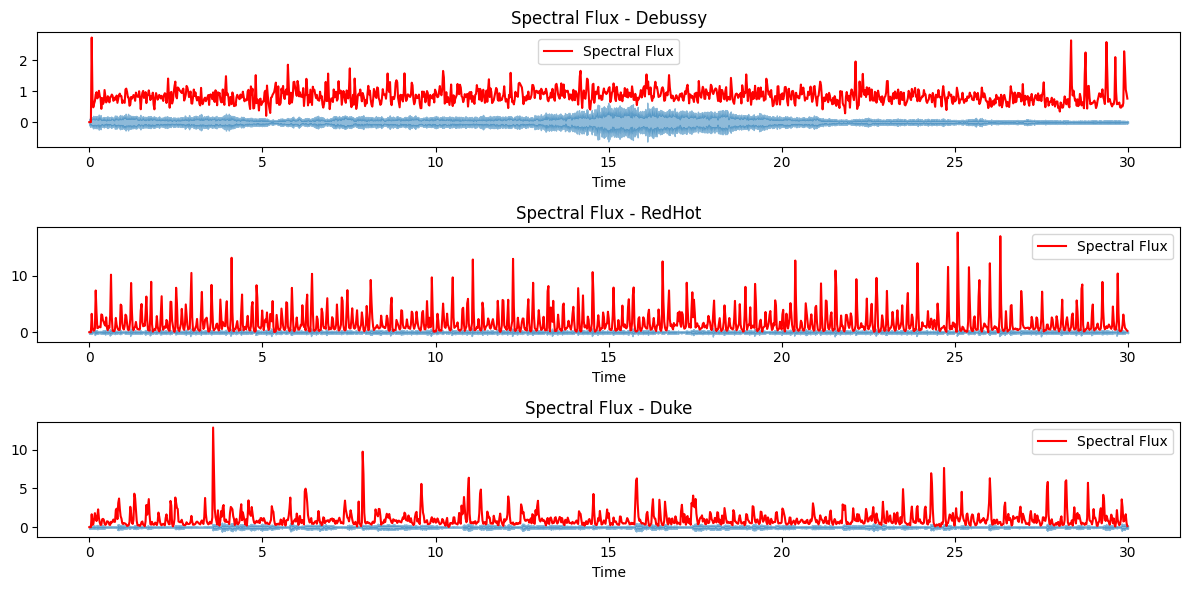

In [33]:
# Function to compute Spectral Flux
def compute_spectral_flux(audio, sr):
    # Calculate the Spectral Flux
    spectral_flux = librosa.onset.onset_strength(y=audio, sr=sr)
    return spectral_flux

# Compute Spectral Flux for each audio file
spectral_flux_debussy = compute_spectral_flux(debussy, sr_debussy)
spectral_flux_redhot = compute_spectral_flux(redhot, sr_redhot)
spectral_flux_duke = compute_spectral_flux(duke, sr_duke)

# Plotting Spectral Flux for each audio file
plt.figure(figsize=(12, 6))

# Plot Spectral Flux for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, sr=sr_debussy, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_debussy), spectral_flux_debussy, label='Spectral Flux', color='r')
plt.title('Spectral Flux - Debussy')
plt.legend()

# Plot Spectral Flux for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, sr=sr_redhot, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_redhot), spectral_flux_redhot, label='Spectral Flux', color='r')
plt.title('Spectral Flux - RedHot')
plt.legend()

# Plot Spectral Flux for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, sr=sr_duke, alpha=0.5)
plt.plot(librosa.times_like(spectral_flux_duke), spectral_flux_duke, label='Spectral Flux', color='r')
plt.title('Spectral Flux - Duke')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Spectral Bandwidth

Description: Spectral bandwidth measures the width of the spectrum, indicating how spread out the frequencies of a sound are. Higher bandwidth suggests a brighter, more complex sound, while lower bandwidth indicates a more focused, simpler sound.

Use Case:

Music Genre Classification: Helps distinguish between genres; e.g., electronic music typically has higher spectral bandwidth than classical music.
Instrument Recognition: Differentiates instruments; e.g., electric guitars have higher spectral bandwidth than pianos.

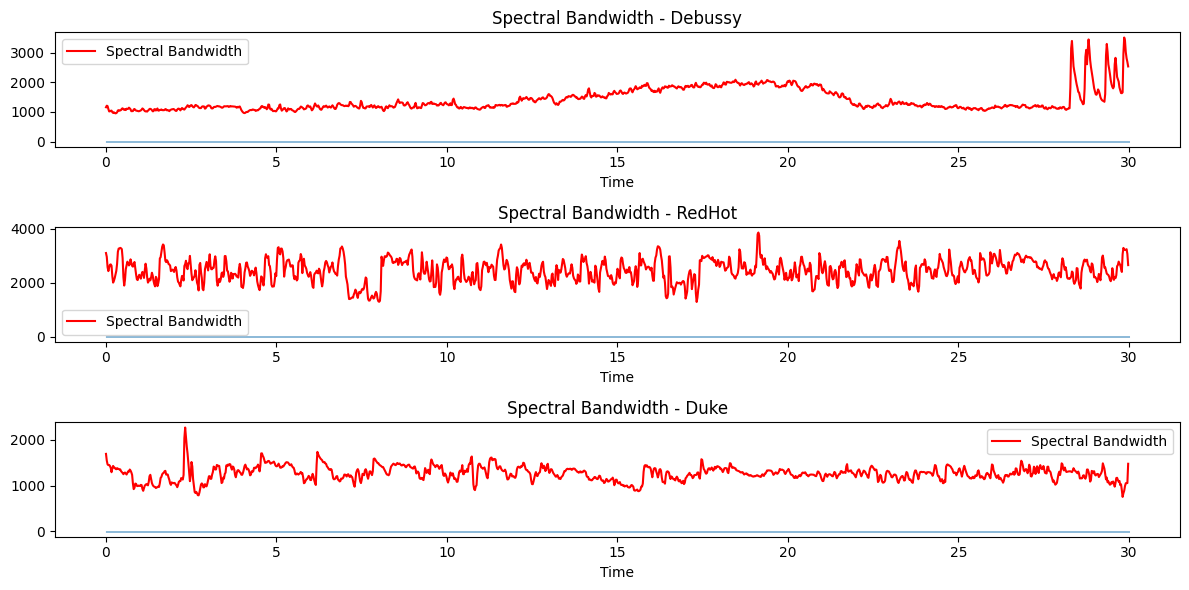

In [35]:
# Function to compute Spectral Bandwidth
def compute_spectral_bandwidth(audio, sr):
    # Compute the Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    return spectral_bandwidth

# Compute Spectral Bandwidth for each audio file
spectral_bandwidth_debussy = compute_spectral_bandwidth(debussy, sr_debussy)
spectral_bandwidth_redhot = compute_spectral_bandwidth(redhot, sr_redhot)
spectral_bandwidth_duke = compute_spectral_bandwidth(duke, sr_duke)

# Plotting Spectral Bandwidth for each audio file
plt.figure(figsize=(12, 6))

# Plot Spectral Bandwidth for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, sr=sr_debussy, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_debussy), spectral_bandwidth_debussy[0], label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - Debussy')
plt.legend()

# Plot Spectral Bandwidth for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, sr=sr_redhot, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_redhot), spectral_bandwidth_redhot[0], label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - RedHot')
plt.legend()

# Plot Spectral Bandwidth for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, sr=sr_duke, alpha=0.5)
plt.plot(librosa.times_like(spectral_bandwidth_duke), spectral_bandwidth_duke[0], label='Spectral Bandwidth', color='r')
plt.title('Spectral Bandwidth - Duke')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Mel-Frequency Cepstral Coefficients (MFCC)

Description: MFCCs are a representation of the short-term power spectrum of sound, often used in speech and audio processing. They are based on the Mel scale, which approximates the human ear’s perception of pitch.

Use Case:
Widely used in speech recognition, as they effectively represent speech characteristics, making them ideal for tasks like transcription or speaker identification.
In music genre classification, MFCCs can help differentiate between genres by capturing timbral features.

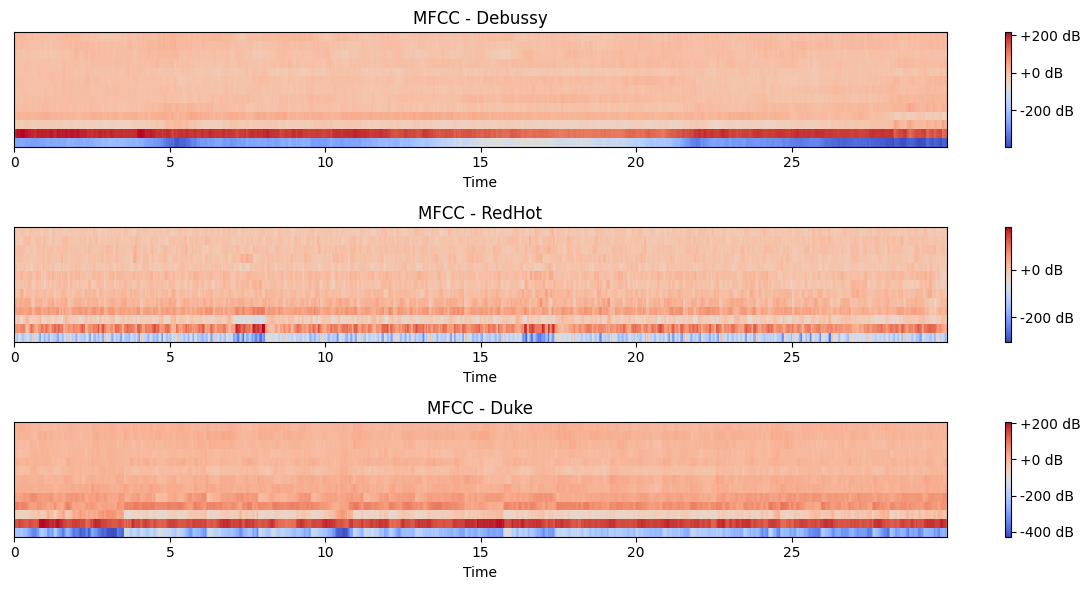

In [36]:
# Function to compute MFCCs
def compute_mfcc(audio, sr):
    # Compute the MFCCs
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # Typically 13 MFCCs are used
    return mfcc

# Compute MFCCs for each audio file
mfcc_debussy = compute_mfcc(debussy, sr_debussy)
mfcc_redhot = compute_mfcc(redhot, sr_redhot)
mfcc_duke = compute_mfcc(duke, sr_duke)

# Plotting MFCCs for each audio file
plt.figure(figsize=(12, 6))

# Plot MFCCs for Debussy
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc_debussy, x_axis='time', sr=sr_debussy, cmap='coolwarm')
plt.title('MFCC - Debussy')
plt.colorbar(format='%+2.0f dB')

# Plot MFCCs for RedHot
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_redhot, x_axis='time', sr=sr_redhot, cmap='coolwarm')
plt.title('MFCC - RedHot')
plt.colorbar(format='%+2.0f dB')

# Plot MFCCs for Duke
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_duke, x_axis='time', sr=sr_duke, cmap='coolwarm')
plt.title('MFCC - Duke')
plt.colorbar(format='%+2.0f dB')

# Show the plots
plt.tight_layout()
plt.show()

Pitch (Fundamental Frequency)

Description: Pitch refers to the perceived frequency of a sound, typically linked to the fundamental frequency (the lowest frequency of a periodic waveform).

Use Case:
In speech synthesis and music composition, pitch detection is crucial for creating natural-sounding speech and musical notes.
In music analysis, pitch is fundamental for tasks like key detection, melody extraction, or chord recognition.

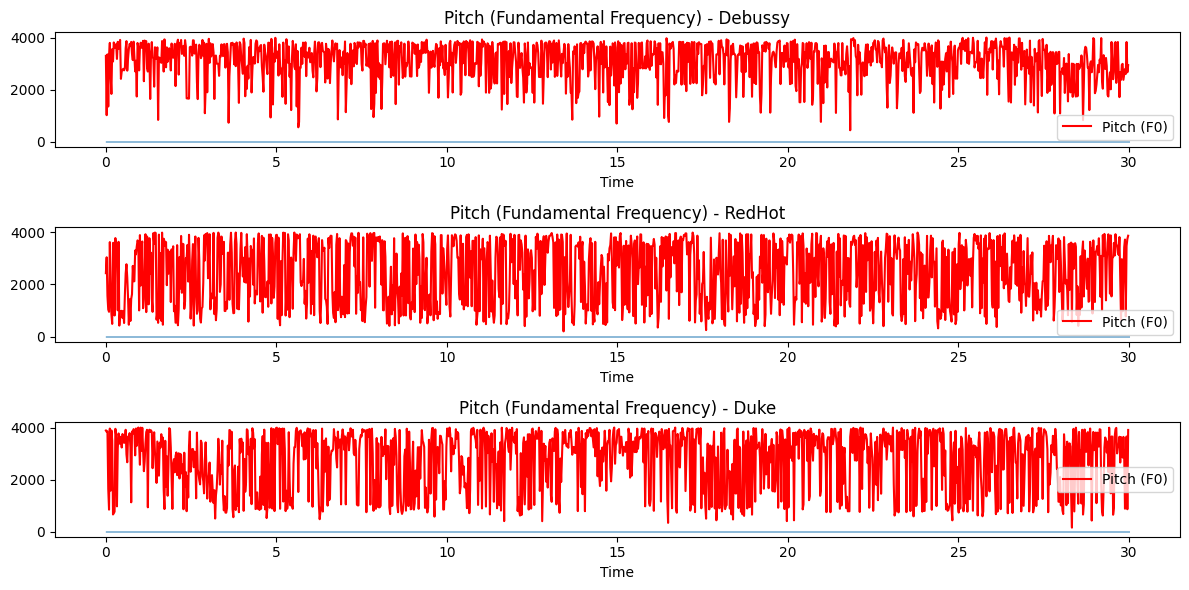

In [37]:
# Function to compute the pitch (fundamental frequency)
def compute_pitch(audio, sr):
    # Use librosa's piptrack to extract pitch (fundamental frequency)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    pitches, magnitudes = librosa.core.piptrack(S=D, sr=sr)
    
    # Get the pitch with the highest magnitude at each time frame
    pitch = []
    for t in range(pitches.shape[1]):
        index = magnitudes[:, t].argmax()  # Get index of max magnitude
        pitch.append(pitches[index, t])
    
    return np.array(pitch)

# Compute pitch (fundamental frequency) for each audio file
pitch_debussy = compute_pitch(debussy, sr_debussy)
pitch_redhot = compute_pitch(redhot, sr_redhot)
pitch_duke = compute_pitch(duke, sr_duke)

# Plotting Pitch (Fundamental Frequency) for each audio file
plt.figure(figsize=(12, 6))

# Plot Pitch for Debussy
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, sr=sr_debussy, alpha=0.5)
plt.plot(librosa.times_like(pitch_debussy), pitch_debussy, label='Pitch (F0)', color='r')
plt.title('Pitch (Fundamental Frequency) - Debussy')
plt.legend()

# Plot Pitch for RedHot
plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, sr=sr_redhot, alpha=0.5)
plt.plot(librosa.times_like(pitch_redhot), pitch_redhot, label='Pitch (F0)', color='r')
plt.title('Pitch (Fundamental Frequency) - RedHot')
plt.legend()

# Plot Pitch for Duke
plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, sr=sr_duke, alpha=0.5)
plt.plot(librosa.times_like(pitch_duke), pitch_duke, label='Pitch (F0)', color='r')
plt.title('Pitch (Fundamental Frequency) - Duke')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()